In [1]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fildids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fildids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fildids]

In [4]:
np.random.seed(7)
tf.random.set_seed(7)

In [13]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
print([len(doc) for doc in X[:10]], X[:2])

[710, 240, 486, 479, 733, 671, 550, 584, 702, 776] [[98, 77, 949, 4622, 131, 6, 3, 2016, 789, 3764, 4, 103, 1314, 37, 73, 56, 25, 1341, 24, 5, 2, 519, 1325, 17, 14, 678, 1571, 6, 84, 55, 8, 34, 90, 4, 33, 4477, 604, 2, 638, 242, 2, 27, 4, 8854, 190, 41, 2186, 3, 302, 6462, 27, 13, 2, 949, 1458, 9, 2402, 20, 3, 80, 691, 362, 17, 1768, 10, 8, 3, 80, 106, 3980, 46, 7, 49, 143, 15, 466, 25, 57, 3668, 24, 6, 1175, 195, 19, 1342, 8855, 96, 46, 527, 6, 831, 2, 7098, 903, 12, 170, 363, 4, 118, 342, 4204, 8856, 17, 53, 21, 62, 4, 106, 753, 5, 243, 36, 2695, 5, 96, 4, 113, 1879, 51, 249, 1, 15, 24, 6180, 37, 250, 6, 32, 625, 15, 272, 3765, 1224, 17, 2795, 10, 2284, 40, 49, 21, 2, 470, 12, 2, 27, 78, 65, 349, 354, 7, 9, 38, 322, 89, 7840, 10, 437, 88, 1315, 17, 103, 1, 56, 15, 1446, 146, 8, 46, 35, 11, 25, 162, 1123, 32, 60, 362, 604, 160, 20, 53, 21, 1077, 53, 21, 82, 505, 136, 29, 2, 329, 53, 21, 486, 28, 178, 39, 2, 329, 53, 21, 770, 1, 53, 21, 1, 53, 21, 3, 1, 5, 911, 115, 53, 21, 5278, 5, 13

In [14]:
tokenizer.word_index['the'], tokenizer.word_index['UNK']

(2, 1)

In [15]:
max_len = 500
X = pad_sequences(X, maxlen=max_len, truncating='pre')
print([len(doc) for doc in X[:10]], X[:2])

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500] [[ 911  115   53   21 5278    5 1387  172    9  633    4   64    5   10
     7  322   26 1958  144   19 2927  121  302  255    6 9490    3   16
   151  144    4  103   17   45   36   10   92    7  257  104    2  165
  2852  101    4  101  209   19   73  260    5 4078   43   83    3   95
    46    7   15  248  955  354   38  614  295   15  134  802    6 3147
    17   10  139    6  258    6 3147   10  309  314   65  370  494  227
     4   76   37   87  172  440 2796   47   57 1748    8    2 5676   26
    93    2 1281  205    7    9    2 4079    4   19  159 5677   20 1712
    39   15   40   63  176 4080   64    5   10   41   22    2  269   85
   213   40   36    5    2    1   83    9  198  443    6   87    3   99
   252    5  262   17   10  138  249    2   87    2   16   36    9   44
   440   19  619    2 1487  312   12  122   39   15    7    9   35  168
   246   87  277    9    2  162    7   56   10   57  142   37   21  285
     2  802  

In [16]:
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
len(X_train), len(X_test)

(1600, 400)

In [21]:
model = Sequential([Embedding(max_words, 32, input_length=max_len),
                    Flatten(),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [23]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 1s 6ms/step - loss: 0.6925 - acc: 0.5086 - val_loss: 0.6909 - val_acc: 0.5406
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6161 - acc: 0.8875 - val_loss: 0.6852 - val_acc: 0.5719
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5137 - acc: 0.9641 - val_loss: 0.6727 - val_acc: 0.5813
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3826 - acc: 0.9883 - val_loss: 0.6547 - val_acc: 0.5844
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2536 - acc: 0.9961 - val_loss: 0.6356 - val_acc: 0.6156
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1527 - acc: 0.9984 - val_loss: 0.6276 - val_acc: 0.6125
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0863 - acc: 1.0000 - val_loss: 0.6217 - val_acc: 0.6313
Epoch 8/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0467 - acc: 1.00

In [24]:
history.history['val_acc']

[0.5406249761581421,
 0.5718749761581421,
 0.581250011920929,
 0.5843750238418579,
 0.6156250238418579,
 0.612500011920929,
 0.6312500238418579,
 0.637499988079071,
 0.643750011920929,
 0.6343749761581421,
 0.640625,
 0.640625,
 0.643750011920929,
 0.6468750238418579,
 0.643750011920929,
 0.640625,
 0.6468750238418579,
 0.625,
 0.643750011920929,
 0.6343749761581421]

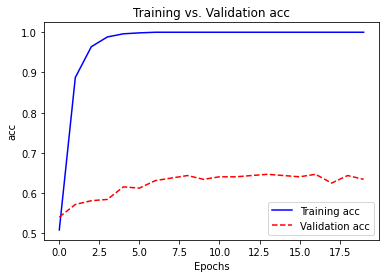

In [25]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [26]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 2ms/step - loss: 0.7571 - acc: 0.6875


[0.7571358680725098, 0.6875]

In [27]:
model = Sequential([Embedding(max_words, 32, input_length=max_len),
                    SimpleRNN(32),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [29]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

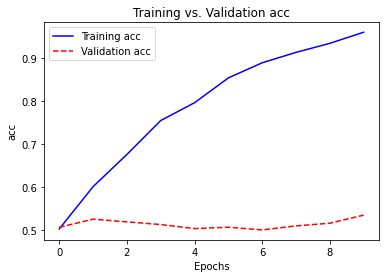

In [30]:
plot_results(history, 'acc')

In [31]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 11ms/step - loss: 0.6947 - acc: 0.5250


[0.694658637046814, 0.5249999761581421]

In [39]:
model = Sequential([Embedding(max_words, 64, input_length=max_len),
                    Bidirectional(LSTM(64)),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 64)           640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714369 (2.73 MB)
Trainable params: 714369 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [41]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 8s 151ms/step - loss: 0.6932 - acc: 0.4875 - val_loss: 0.6930 - val_acc: 0.5219
Epoch 2/10
40/40 [==============================] - 5s 137ms/step - loss: 0.6922 - acc: 0.5570 - val_loss: 0.6928 - val_acc: 0.5250
Epoch 3/10
40/40 [==============================] - 5s 138ms/step - loss: 0.6911 - acc: 0.5977 - val_loss: 0.6927 - val_acc: 0.5125
Epoch 4/10
40/40 [==============================] - 6s 138ms/step - loss: 0.6895 - acc: 0.6055 - val_loss: 0.6924 - val_acc: 0.5219
Epoch 5/10
40/40 [==============================] - 6s 139ms/step - loss: 0.6873 - acc: 0.6297 - val_loss: 0.6917 - val_acc: 0.5250
Epoch 6/10
40/40 [==============================] - 6s 140ms/step - loss: 0.6814 - acc: 0.6680 - val_loss: 0.6871 - val_acc: 0.5531
Epoch 7/10
40/40 [==============================] - 6s 139ms/step - loss: 0.6529 - acc: 0.7234 - val_loss: 0.6652 - val_acc: 0.6531
Epoch 8/10
40/40 [==============================] - 6s 139ms/step - loss: 0.

In [42]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 1s 42ms/step - loss: 0.4460 - acc: 0.7875


[0.4460180997848511, 0.7875000238418579]

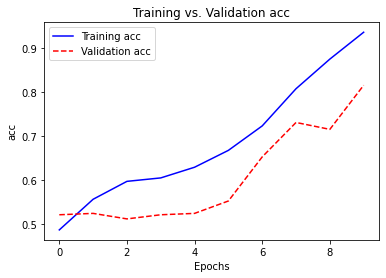

In [43]:
plot_results(history, 'acc')

In [44]:
y_pred = np.round(model.predict(X_test[:100]))
for pred, y_t in zip(y_pred, y_test[:100]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

4/4 [==============================] - 1s 36ms/step
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
p